# ***CSE445 Machine Learning***
# ***Online Class Preference Prediction Using Machine Learning Approach***

###***Notebook owner:*** *Nazmul Hasan | Github: https://github.com/NazmulHasan7*

*We are proposing a machine-learning
model to predict preference of online class among
Bangladeshi students. Our goal is to create an efficient
machine-learning model to predict if a student prefers
online class or not by using some common available
features such as age, gender, level of study, preferred
device, results, knowledge and class performance
development during online class, internet availability,
location of joining, difficulties faced, etc.*

## ***Methodology***

*The major objective of this work is to develop a
machine-learning model that will aid to predict if a
student likes online classes or not. The approach
adopted in this work is outlined in Fig. 1*



test.drawio.svg

*The model to be developed to predict the response for
the training data will be developed using the decision
tree technique. It is one of the most popular and
straightforward machine learning algorithms for
categorization problems. Since supervised
learning approach is to be used in this work and the
model has to predict a target class that is categorized
into “Yes” and “No”, the decision tree algorithm will
be useful to create a training model that can predict the
target class by learning some decision rules inferred
from training data.*

## ***Importing Libraries***

In [1]:
# importing libraries
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualization
%matplotlib inline

import seaborn as sns
# increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, roc_curve, auc, classification_report
import warnings
warnings.filterwarnings('ignore')

## ***Data Acquisition***

*Dataset is collected from Kaggle.
The dataset is created based on an online survey on
Bangladeshi students and it contains 17 features such
as age, level of study, devices used, result, knowledge
and class performance in online class, have interest,
internet availability, institute type, happy with online
class etc.* 

In [ ]:
# mount google drive 
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# raw data in panda dataframe
df = pd.read_csv('/content/drive/MyDrive/CSE 445 Project/Online Survey Data on Education Bd.csv')
print('Data Frame Shape: \n{}'.format(df.shape))
df.columns = df.columns.str.replace('Used smartphone/computer/laptop previously before online class?',
'Used Electronic Devices?')
# shows five instances of the dataframe
print('First few instances of the dataset: ')
df.head()

Data Frame Shape: 
(8783, 17)
First few instances of the dataset: 


,Level of study?,Age?,Used Electronic Devices??,Result increased after online education (comparatively)?,Knowledge increased after online education (comparatively)?,Happy with online education?,Education Institute Area?,Have Internet availability?,Broadband / Mobile Internet?,Total hours of study before online education?,Total hours of study after online education?,Class performance increased in online education?,Institute Type,Current location (During Study) ?,Gender,Faced any issue with online class?,Preferred device for an online course
0,Upto HSC,20.0,Yes,No,Yes,No,Urban,No,Broadband,4,3,No,Public,Rural,Male,Yes,Mobile
1,Hons or Grater,25.0,No,No,No,No,Urban,No,Mobile Internet,4,4,No,Public,Rural,Male,Yes,Mobile
2,Hons or Grater,25.0,Yes,Yes,Yes,Yes,Rural,No,Mobile Internet,5,2,Yes,Public,Rural,Female,Yes,Computer
3,Upto HSC,21.0,Yes,Yes,No,Yes,Urban,Yes,Mobile Internet,5,3,No,Private,Urban,Male,Yes,Mobile
4,Hons or Grater,22.0,Yes,No,No,No,Rural,No,Mobile Internet,4,2,Yes,Public,Urban,Male,No,Mobile


In [4]:
# columns of the dataset
df.columns

Index(['Level of study?', 'Age?', 'Used Electronic Devices??',
       'Result increased after online education  (comparatively)?',
       'Knowledge increased after online education (comparatively)?',
       'Happy with online education?', 'Education Institute Area?',
       'Have Internet availability?', 'Broadband / Mobile Internet?',
       'Total hours of study before online education?',
       'Total hours of study after online education?',
       'Class performance increased in online education?', 'Institute Type',
       'Current location (During Study) ?', 'Gender',
       'Faced any issue with online class?',
       'Preferred device for an online course'],
      dtype='object')

In [5]:
# investigating all the elements whithin each Feature
for column in df:
  unique_vals = df[column].unique()
  nr_values = len(unique_vals)
  
  if nr_values < 10:
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
  else:
    print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Level of study? :2 -- ['Upto HSC' 'Hons or Grater']
The number of values for feature Age? :12
The number of values for feature Used Electronic Devices?? :3 -- ['Yes' 'No' nan]
The number of values for feature Result increased after online education  (comparatively)? :3 -- ['No' 'Yes' nan]
The number of values for feature Knowledge increased after online education (comparatively)? :2 -- ['Yes' 'No']
The number of values for feature Happy with online education? :2 -- ['No' 'Yes']
The number of values for feature Education Institute Area? :3 -- ['Urban' 'Rural' nan]
The number of values for feature Have Internet availability? :2 -- ['No' 'Yes']
The number of values for feature Broadband / Mobile Internet? :2 -- ['Broadband' 'Mobile Internet']
The number of values for feature Total hours of study before online education? :4 -- [4 5 3 6]
The number of values for feature Total hours of study after online education? :3 -- [3 4 2]
The number of values for featu

In [6]:
# checking for the null values
df.isnull().sum()

Level of study?                                                  0
Age?                                                           445
Used Electronic Devices??                                      188
Result increased after online education  (comparatively)?      323
Knowledge increased after online education (comparatively)?      0
Happy with online education?                                     0
Education Institute Area?                                      529
Have Internet availability?                                      0
Broadband / Mobile Internet?                                     0
Total hours of study before online education?                    0
Total hours of study after online education?                     0
Class performance increased in online education?                 0
Institute Type                                                 726
Current location (During Study) ?                              726
Gender                                                        

## ***Data Preprocessing***

*For some entries in the collection, multiple columns have null values. The null values are removed. Correlation Matrix is also plotted to see the relationship among attributes.*

### ***Removing Null Values***
*Removing null values to make a clean dataset*

In [7]:
# removing rows containing null values and creating a demo dataset
new_df = df.dropna()
print('New Data Frame Shape: ', new_df.shape)

New Data Frame Shape:  (5715, 17)


In [8]:
# checking null values in new data frame
new_df.isnull().sum()

Level of study?                                                0
Age?                                                           0
Used Electronic Devices??                                      0
Result increased after online education  (comparatively)?      0
Knowledge increased after online education (comparatively)?    0
Happy with online education?                                   0
Education Institute Area?                                      0
Have Internet availability?                                    0
Broadband / Mobile Internet?                                   0
Total hours of study before online education?                  0
Total hours of study after online education?                   0
Class performance increased in online education?               0
Institute Type                                                 0
Current location (During Study) ?                              0
Gender                                                         0
Faced any issue with onli

In [9]:
# exporting new dataframe as csv
new_df.to_csv('/content/drive/MyDrive/CSE 445 Project/Online Education Filtered.csv')

In [10]:
# attributes of new dataframe
new_df.columns

Index(['Level of study?', 'Age?', 'Used Electronic Devices??',
       'Result increased after online education  (comparatively)?',
       'Knowledge increased after online education (comparatively)?',
       'Happy with online education?', 'Education Institute Area?',
       'Have Internet availability?', 'Broadband / Mobile Internet?',
       'Total hours of study before online education?',
       'Total hours of study after online education?',
       'Class performance increased in online education?', 'Institute Type',
       'Current location (During Study) ?', 'Gender',
       'Faced any issue with online class?',
       'Preferred device for an online course'],
      dtype='object')

### ***Dataset Encoding***
*Encoding the dataset to make it suitable for machine learning algorithms*

In [11]:
# data types
new_df.dtypes

Level of study?                                                 object
Age?                                                           float64
Used Electronic Devices??                                       object
Result increased after online education  (comparatively)?       object
Knowledge increased after online education (comparatively)?     object
Happy with online education?                                    object
Education Institute Area?                                       object
Have Internet availability?                                     object
Broadband / Mobile Internet?                                    object
Total hours of study before online education?                    int64
Total hours of study after online education?                     int64
Class performance increased in online education?                object
Institute Type                                                  object
Current location (During Study) ?                               object
Gender

In [12]:
# Find out all the features with type object
objectList = new_df.select_dtypes(include = "object").columns
print (objectList)

Index(['Level of study?', 'Used Electronic Devices??',
       'Result increased after online education  (comparatively)?',
       'Knowledge increased after online education (comparatively)?',
       'Happy with online education?', 'Education Institute Area?',
       'Have Internet availability?', 'Broadband / Mobile Internet?',
       'Class performance increased in online education?', 'Institute Type',
       'Current location (During Study) ?', 'Gender',
       'Faced any issue with online class?',
       'Preferred device for an online course'],
      dtype='object')


In [13]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for obj in objectList:
    new_df[obj] = encoder.fit_transform(new_df[obj].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5715 entries, 0 to 8781
Data columns (total 17 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Level of study?                                              5715 non-null   int64  
 1   Age?                                                         5715 non-null   float64
 2   Used Electronic Devices??                                    5715 non-null   int64  
 3   Result increased after online education  (comparatively)?    5715 non-null   int64  
 4   Knowledge increased after online education (comparatively)?  5715 non-null   int64  
 5   Happy with online education?                                 5715 non-null   int64  
 6   Education Institute Area?                                    5715 non-null   int64  
 7   Have Internet availability?                                  5715 non-null   i

In [14]:
# exporting new dataframe as csv
new_df.to_csv('/content/drive/MyDrive/CSE 445 Project/Online Education Cleanded Dataset.csv')

### ***Splitting Dataset***
*Splitting the dataset in a 70:30 ratio.
70% for training & 30% for testing* 

In [15]:
# separating attributes and target
attribute = new_df.drop(columns = ['Happy with online education?'])
target = new_df['Happy with online education?']
print('Attribute Shape: ', attribute.shape)
print('Target Shape: ', target.shape)

Attribute Shape:  (5715, 16)
Target Shape:  (5715,)


In [16]:
target.value_counts()

0    3677
1    2038
Name: Happy with online education?, dtype: int64

In [17]:
# first few instances of attribute
attribute.columns = attribute.columns.str.replace('Used smartphone/computer/laptop previously before online class?', 
                                                    'Used Electronic Devices?')
attribute.head()

,Level of study?,Age?,Used Electronic Devices??,Result increased after online education (comparatively)?,Knowledge increased after online education (comparatively)?,Education Institute Area?,Have Internet availability?,Broadband / Mobile Internet?,Total hours of study before online education?,Total hours of study after online education?,Class performance increased in online education?,Institute Type,Current location (During Study) ?,Gender,Faced any issue with online class?,Preferred device for an online course
0,1,20.0,1,0,1,1,0,0,4,3,0,1,0,1,1,1
1,0,25.0,0,0,0,1,0,1,4,4,0,1,0,1,1,1
2,0,25.0,1,1,1,0,0,1,5,2,1,1,0,0,1,0
3,1,21.0,1,1,0,1,1,1,5,3,0,0,1,1,1,1
4,0,22.0,1,0,0,0,0,1,4,2,1,1,1,1,0,1


In [18]:
# first few instances of target
target.head()

0    0
1    0
2    1
3    1
4    0
Name: Happy with online education?, dtype: int64

In [19]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(attribute, target, train_size = 0.7, test_size = 0.3, random_state = 0)

In [20]:
print('For training: ')
print('Attribute Shape: ', X_train.shape)
print('Target Shape: ', y_train.shape)

print('\nFor testing: ')
print('Attribute Shape: ', X_test.shape)
print('Target Shape: ', y_test.shape)

For training: 
Attribute Shape:  (4000, 16)
Target Shape:  (4000,)

For testing: 
Attribute Shape:  (1715, 16)
Target Shape:  (1715,)


### ***Correlation of Features***
*Finding the correlation among the features to see how they are connected. Main purpose is to find duplicate features*

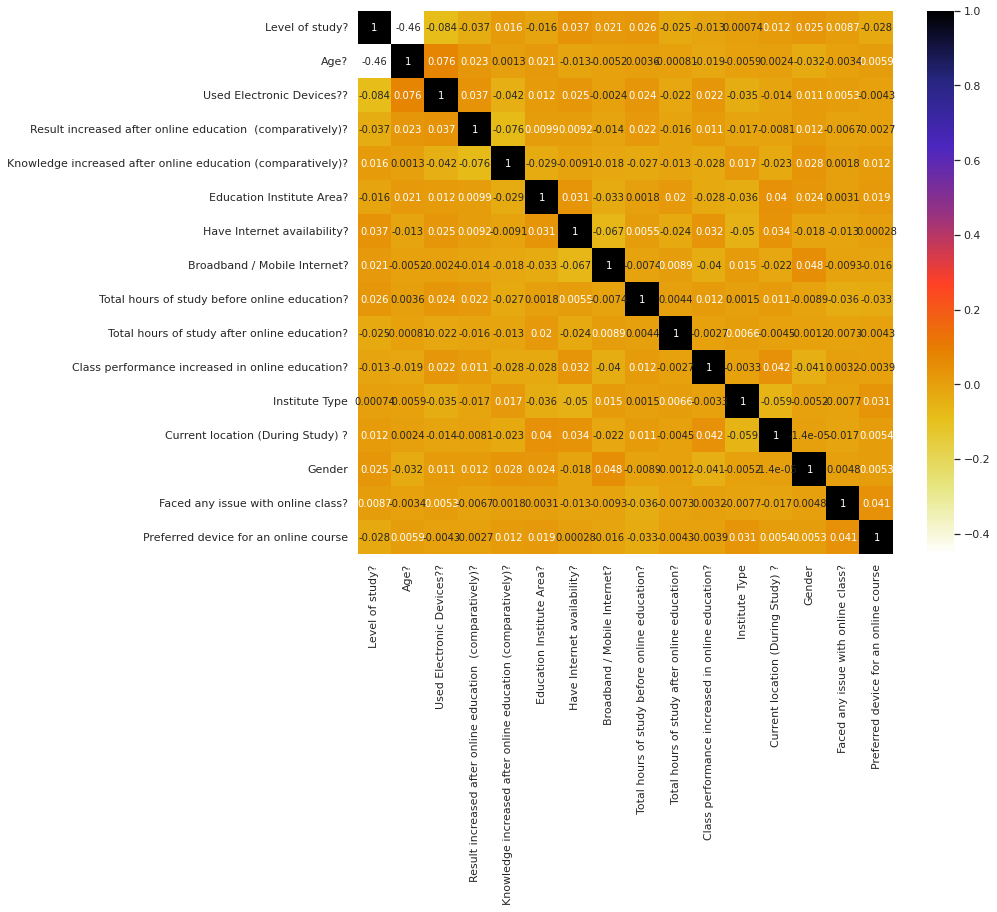

In [21]:
# using pearson correlation
plt.figure(figsize=(12, 10))
correlation = X_train.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## ***Decision Tree***
*Initially building a decision tree model with a max depth 5, later we will build a random forest classification model with hyper parameter tuing*


In [22]:
# Decision Tree Model
dtree = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [23]:
# Graph available in:  https://dreampuf.github.io/GraphvizOnline
import graphviz

dot_data = tree.export_graphviz(dtree, out_file='/content/drive/MyDrive/CSE 445 Project/Decision Tree.dot',
feature_names = new_df.drop('Happy with online education?', axis=1).columns,
class_names = new_df['Happy with online education?'].unique().astype(str),
filled=True, rounded=True,
special_characters=True)

graph = graphviz.Source(dot_data)

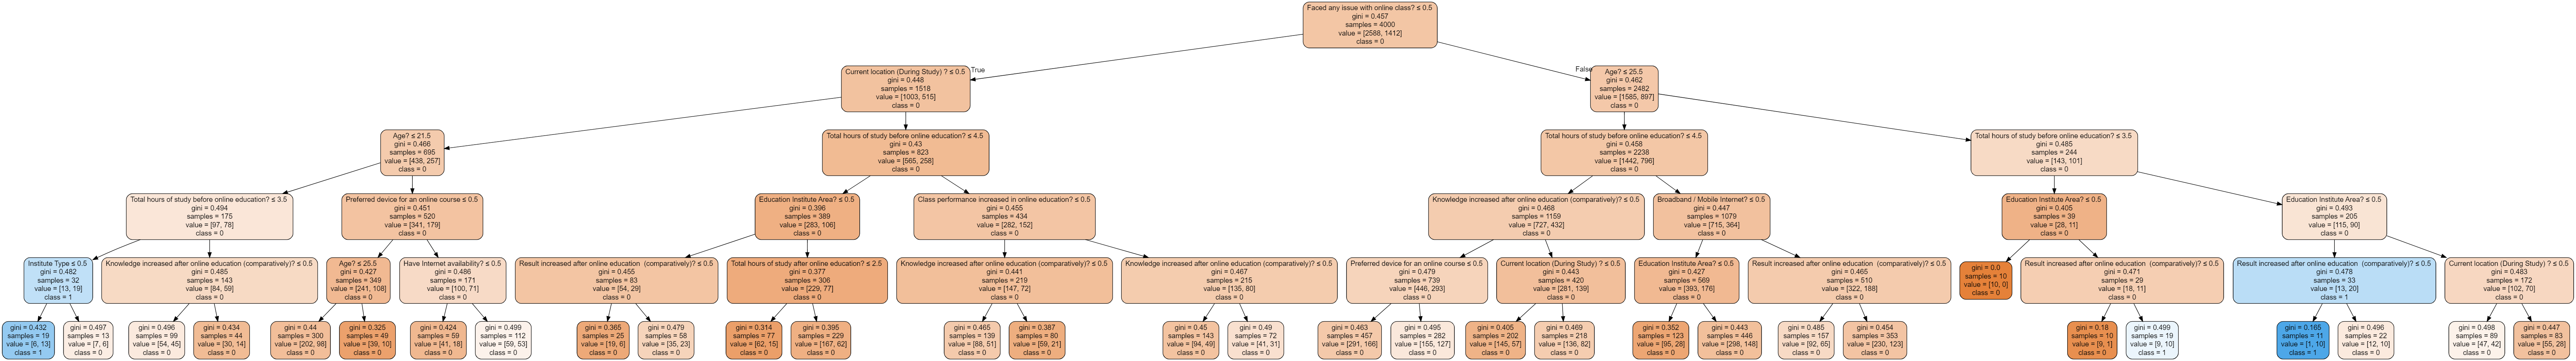

In [24]:
# Decision Tree generated from Graphviz
from IPython.display import Image
Image(filename='/content/drive/MyDrive/CSE 445 Project/Decision Tree.png')

### ***Feature Importance***

In [25]:
# Finding importance of each feature

for i, column in enumerate(new_df.drop('Happy with online education?', axis=1)):
  print('Importance of feature {}:, {:.3f}'.format(column, dtree.feature_importances_[i]))
  feature_imp = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dtree.feature_importances_[i]]})

  try:
    final_feature_imp = pd.concat([final_feature_imp, feature_imp], ignore_index = True)
  except:
    final_feature_imp = feature_imp

# Ordering the data
final_feature_imp = final_feature_imp.sort_values('Feature Importance Score', ascending = False).reset_index()
final_feature_imp

Importance of feature Level of study?:, 0.000
Importance of feature Age?:, 0.108
Importance of feature Used Electronic Devices??:, 0.000
Importance of feature Result increased after online education  (comparatively)?:, 0.142
Importance of feature Knowledge increased after online education (comparatively)?:, 0.104
Importance of feature Education Institute Area?:, 0.151
Importance of feature Have Internet availability?:, 0.043
Importance of feature Broadband / Mobile Internet?:, 0.037
Importance of feature Total hours of study before online education?:, 0.142
Importance of feature Total hours of study after online education?:, 0.013
Importance of feature Class performance increased in online education?:, 0.008
Importance of feature Institute Type:, 0.015
Importance of feature Current location (During Study) ?:, 0.114
Importance of feature Gender:, 0.000
Importance of feature Faced any issue with online class?:, 0.018
Importance of feature Preferred device for an online course:, 0.103


,index,Variable,Feature Importance Score
0,5,Education Institute Area?,0.151486
1,8,Total hours of study before online education?,0.142285
2,3,Result increased after online education (comp...,0.142143
3,12,Current location (During Study) ?,0.114371
4,1,Age?,0.107682
5,4,Knowledge increased after online education (co...,0.104196
6,15,Preferred device for an online course,0.102895
7,6,Have Internet availability?,0.043115
8,7,Broadband / Mobile Internet?,0.037344
9,14,Faced any issue with online class?,0.018224


### ***Result From Decision Tree***

In [26]:
# Training Accuracy Of Decision Tree
print("Training Accuracy is: ", dtree.score(X_train, y_train))

# Test Accuracy Of Decision Tree
print("Testing Accuracy is: ", dtree.score(X_test, y_test))

Training Accuracy is:  0.65125
Testing Accuracy is:  0.6297376093294461


In [27]:
# after applying k fold cross validation
kfold_validation = KFold(n_splits = 10)
results = cross_val_score(dtree, attribute, target, cv = kfold_validation)
print(results)
print ('\nResults = ', np.mean(results), '+/-', np.std(results))

[0.6520979  0.62587413 0.63286713 0.63461538 0.64160839 0.6357268
 0.62521891 0.63397548 0.67250438 0.6234676 ]

Results =  0.6377956106940345 +/- 0.014080679908422033


In [28]:
# Confusion Matrix
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
  if classes is not None:
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
  else:
    sns.heatmap(cm, vmin=0., vmax=1.)
    
  plt.title(title)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [29]:
# prediction
y_pred = dtree.predict(X_train)

# Plotting Confusion Matrix for Training
cmatrix = confusion_matrix(y_train, y_pred)

In [30]:
cmatrix

array([[2572,   16],
       [1379,   33]])

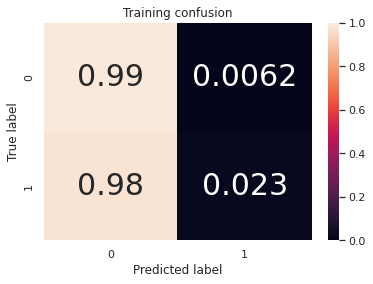

In [31]:
cmatrix_norm = cmatrix/cmatrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cmatrix_norm, classes=dtree.classes_, title='Training confusion')

In [32]:
# Calculating False Positives (FP), False Negatives (FN), True Positives(TP), True Negatices (TN)
FP = cmatrix.sum(axis=0) - np.diag(cmatrix)
FN = cmatrix.sum(axis=1) - np.diag(cmatrix)
TP = np.diag(cmatrix)
TN = cmatrix.sum() - (FP + FN + TP)

# precision or positive predictive value
precision = TP / (TP + FP)
print('Precision per class: ', precision)

# sensitivity, recall or true predictive rate
recall = TP / (TP + FN)
print('Recall per class: ', recall)

# false positive rate
fpr = FP / (FP + TN)
print('False positive rate per class: ', fpr)

# false negative rate
fnr = FN / (TP + FN)
print('False negative rate per class: ', fnr)

# classification error
c_error = (FP + FN) / (TP + FP + FN + TN)
print('The classification error of each class: ' ,c_error)

# overall accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)
print('The accuracy of each class: ' ,accuracy)

# Averages
print('\nAverage Recall : ' ,recall.sum()/2)
print('Average Precision : ' ,precision.sum()/2)
print('Average Miss Rate : ' ,fnr.sum()/2)
print('Average Classification error : ' ,c_error.sum()/2)
print('Average accuracy : ' ,accuracy.sum()/2)

Precision per class:  [0.65097444 0.67346939]
Recall per class:  [0.99381762 0.0233711 ]
False positive rate per class:  [0.9766289  0.00618238]
False negative rate per class:  [0.00618238 0.9766289 ]
The classification error of each class:  [0.34875 0.34875]
The accuracy of each class:  [0.65125 0.65125]

Average Recall :  0.5085943622997404
Average Precision :  0.662221912303266
Average Miss Rate :  0.49140563770025963
Average Classification error :  0.34875
Average accuracy :  0.65125


### ***Tuning Decision Tree***
*Tuning the decision tree and applying cross validation technique to see if we can find a better result*

In [33]:
from random import randint
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15],
    'criterion': ['gini', 'entropy']
}

tunned_tree = DecisionTreeClassifier()
# applying cross validation technique
tunned_tree_cv = RandomizedSearchCV(tunned_tree, parameters, cv=10)
tunned_tree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 12, 14, 15]})

In [34]:
print('Tunned Decision Tree Parameters {}'.format(tunned_tree_cv.best_params_))
print('Best score: {}'.format(tunned_tree_cv.best_score_))

Tunned Decision Tree Parameters {'max_depth': 1, 'criterion': 'gini'}
Best score: 0.6469999999999999


*So far the model accuracy is not good. Lets try random forest algortihm to see if we can find a better model with better accuracy*

*We will also perform some hyper parameter tuning to get a better model*

# ***Random Forest***
*A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Takes the average of many Decision Trees via bagging.* 

*n_estmators : number of trees in a forest*

*max_depth : the maximum depth of the tree*

*max_features : maximum number of features to consider when looking for the best split*

*min_samples_split : minimum number of samples required to split an internal node*

*min_samples_leaf : minimum number of samples required to be at a leaf node*

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=300, criterion='entropy')
forest.fit(X_train, y_train)
prediction_test = forest.predict(X=X_test)

# Training Accuracy Of Random Forest
print("Training Accuracy : ", forest.score(X_train, y_train))

# Test Accuracy Of Random Forest
print("Testing Accuracy : ", forest.score(X_test, y_test))

Training Accuracy :  0.98975
Testing Accuracy :  0.6011661807580175


*The model overfitted since we did not define any max_depth*

## ***Randomized Search CV***
*Random Search. Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain*

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 100,5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 9, 10, 11, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 7, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
  'max_features': max_features,
  'max_depth': max_depth,
  'min_samples_split': min_samples_split,
  'min_samples_leaf': min_samples_leaf,
  'criterion':['entropy','gini']
}
print(random_grid)

In [55]:
rand_forest = RandomForestClassifier()
rand_forest_randomcv = RandomizedSearchCV(estimator=rand_forest,param_distributions=random_grid,
                                          n_iter=100,cv=10,verbose=2, random_state=100,n_jobs=-1)
# fit the randomized model
rand_forest_randomcv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 28, 52, 76, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 7, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9, 10,
                                                              11, 14],
                                        'n_estimators': [20, 51, 82, 113, 144,
                                                         175, 206, 237, 268,
                                                         300]},
                   random_state=100, verbose=2)

In [56]:
# best parameters
rand_forest_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 10,
 'n_estimators': 206}

In [57]:
# best estimator
rand_forest_randomcv.best_estimator_

RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=10, n_estimators=206)

In [58]:
best_random_grid = rand_forest_randomcv.best_estimator_

In [60]:
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[1089    0]
 [ 624    2]]
Accuracy Score 0.6361516034985423
Classification report: 
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1089
           1       1.00      0.00      0.01       626

    accuracy                           0.64      1715
   macro avg       0.82      0.50      0.39      1715
weighted avg       0.77      0.64      0.50      1715



## ***Hyperparameter Tuning*** 

In [42]:
from itertools import product

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 500]
max_features = ['auto', 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15]

train_results = []
test_results = []

# to iterate through all possible combinations
for feature, depth in product(max_features, max_depths):
  for estimator in n_estimators:
    tunned_forest = RandomForestClassifier(n_estimators=estimator,
                                    criterion='entropy',
                                    max_features=feature,
                                    max_depth=depth,
                                    n_jobs=1,
                                    random_state=30)

    tunned_forest.fit(X_train, y_train)
    prediction_train = tunned_forest.predict(X=X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, prediction_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    prediction_test = tunned_forest.predict(X=X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)


    # Checking classification accuracy of each tree
    print('For n_estimators : ' ,estimator)
    print('Classification accuracy on Train set with max_features = {} and max_depth = {}: Accuracy: = {}'
        .format(feature, depth, accuracy_score(y_train, prediction_train)))
    
    print('Classification accuracy on test set with max_features = {} and max_depth = {}: Accuracy: = {}'
        .format(feature, depth, accuracy_score(y_test, prediction_test)))
    print()
    # Generating confusion matrix
    c_matrix = confusion_matrix(y_test, prediction_test)
    c_matrix_norm = c_matrix/c_matrix.sum(axis=1)[:, np.newaxis]

    #plt.figure()
    #plot_confusion_matrix(c_matrix_norm, classes=tunned_forest.classes_,
    #    title='Classification accuracy on test set with max_features = {} and max_depth = {}: Accuracy = {}'
    #                      .format(feature, depth, accuracy_score(y_test, prediction_test)))

For n_estimators :  1
Classification accuracy on Train set with max_features = auto and max_depth = None: Accuracy: = 0.83175
Classification accuracy on test set with max_features = auto and max_depth = None: Accuracy: = 0.5317784256559767

For n_estimators :  2
Classification accuracy on Train set with max_features = auto and max_depth = None: Accuracy: = 0.833
Classification accuracy on test set with max_features = auto and max_depth = None: Accuracy: = 0.5790087463556851

For n_estimators :  4
Classification accuracy on Train set with max_features = auto and max_depth = None: Accuracy: = 0.8965
Classification accuracy on test set with max_features = auto and max_depth = None: Accuracy: = 0.5865889212827988

For n_estimators :  8
Classification accuracy on Train set with max_features = auto and max_depth = None: Accuracy: = 0.95225
Classification accuracy on test set with max_features = auto and max_depth = None: Accuracy: = 0.5830903790087464

For n_estimators :  16
Classification a

## ***Random Forest***
Building a RandomForest model based on best parameters

In [43]:
rand_forest = RandomForestClassifier(n_estimators=200, 
                                     criterion='entropy',
                                     max_features='log2',
                                     max_depth=9)
rand_forest.fit(X_train, y_train)
prediction_test = rand_forest.predict(X_test)
prediction_train = rand_forest.predict(X_train)

# Training Accuracy Of Random Forest
print("Training Accuracy : ", rand_forest.score(X_train, y_train))

# Test Accuracy Of Random Forest
print("Testing Accuracy : ", rand_forest.score(X_test, y_test))

Training Accuracy :  0.72825
Testing Accuracy :  0.6361516034985423


In [44]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1089
           1       0.57      0.01      0.03       626

    accuracy                           0.64      1715
   macro avg       0.60      0.50      0.40      1715
weighted avg       0.61      0.64      0.50      1715



In [45]:
# feature scores
feature_scores = pd.Series(rand_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Age?                                                           0.175185
Total hours of study before online education?                  0.111110
Total hours of study after online education?                   0.083414
Education Institute Area?                                      0.050592
Knowledge increased after online education (comparatively)?    0.050544
Gender                                                         0.050532
Result increased after online education  (comparatively)?      0.050390
Preferred device for an online course                          0.050249
Faced any issue with online class?                             0.049787
Class performance increased in online education?               0.049142
Institute Type                                                 0.048337
Broadband / Mobile Internet?                                   0.047752
Have Internet availability?                                    0.047577
Current location (During Study) ?                              0

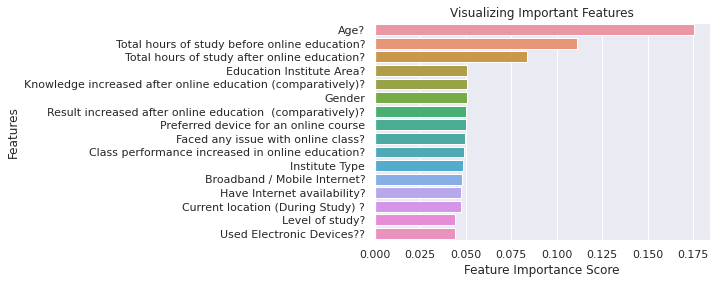

In [46]:
# seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### ***Confusion Matrix***

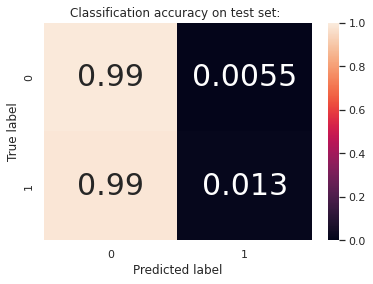

In [52]:
c_matrix_rand = confusion_matrix(y_test, prediction_test)
c_matrix_norm = c_matrix_rand/c_matrix_rand.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(c_matrix_norm, classes=rand_forest.classes_,
    title='Classification accuracy on test set: '
                   .format(accuracy_score(y_test, prediction_test)))

In [54]:
c_matrix_rand

array([[1083,    6],
       [ 618,    8]])